# Simple Geometry

In [2]:
from shapely.geometry import Point, LineString, Polygon

In [4]:
point1 = Point(2.2,4.2)
point2 = Point(7.2,-25.1)
point3 = Point(9.26,-2.456)

point3D = Point(9.26,-2.456,0.57)

In [5]:
type(point1)

shapely.geometry.point.Point

In [6]:
type(point3D)

shapely.geometry.point.Point

In [7]:
print(point1)

POINT (2.2 4.2)


In [9]:
type(point1.coords)

shapely.coords.CoordinateSequence

In [15]:
xy=point1.coords.xy

In [16]:
x = point1.x ; y = point1.y

In [17]:
print(xy)

(array('d', [2.2]), array('d', [4.2]))


In [19]:
point_dist = point1.distance(point2)
point_dist

29.723559679150142

In [20]:
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


In [22]:
line = LineString([point1, point2, point3])

In [23]:
# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [24]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [25]:
line.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [30]:
line.xy[1]

array('d', [4.2, -25.1, -2.456])

In [31]:
line.length

52.46106912939557

In [33]:
print(line.centroid)

POINT (6.229961354035622 -11.89241115757239)


In [50]:
poly = Polygon([(2.2, 4.2), (7.2, -15.1), (9.26, -2.45) , (7.26, 5.45)])

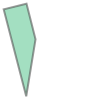

In [51]:
poly

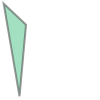

In [54]:
poly2 = Polygon([[p.x,p.y] for p in [point1,point2,point3]])
poly2

In [55]:
poly.geom_type

'Polygon'

In [60]:
poly_type = type(poly)

In [61]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -15.1, 9.26 -2.45, 7.26 5.45, 2.2 4.2))


In [62]:
print("Geometry type as text:", poly_type)

Geometry type as text: <class 'shapely.geometry.polygon.Polygon'>


In [63]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
world = Polygon(shell=world_exterior)

In [64]:
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

In [65]:
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


In [66]:
print(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


In [71]:
print(world.centroid), print(world.area),print(world.exterior),print(world.length)

POINT (-0 -0)
64800.0
LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
1080.0


(None, None, None, None)

# Geometry Collections

In [72]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [73]:
multi_point = MultiPoint([point1,point2,point3])

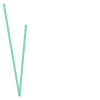

In [75]:
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])
multi_line

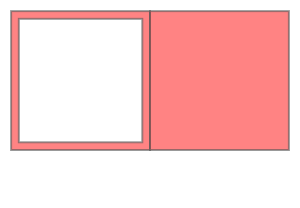

In [76]:
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])
multi_poly

In [77]:
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


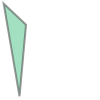

In [82]:
convex = multi_point.convex_hull
convex

In [79]:
lines_count = len(multi_line)

In [83]:
multi_poly_area = multi_poly.area
multi_poly_area

39200.0

In [85]:
west_area = multi_poly[0].area
print(west_area)

6800.0


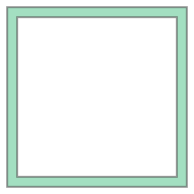

In [86]:
multi_poly[0]

In [87]:
multi_poly.is_valid

False